In [1]:
from keras import layers
layer=layers.Dense(32,input_shape=(784,))

Using TensorFlow backend.


In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32,input_shape=(784,)))
model.add(layers.Dense(32))

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

In [0]:
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)

In [0]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='mse',metrics=['accuracy'])

# Binary Classification Example

# IMDB DATA Loading

In [6]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 13s 1us/step


In [7]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [8]:
train_labels[0]

1

In [9]:
max([max(sequence) for sequence in train_data])

9999

In [10]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 2s 1us/step


In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
     results[i, sequence] = 1.
  return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
import numpy as np
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [0]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [21]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history =model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 185us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - val_ac

15000/15000 [==============================] - 1s 94us/step - loss: 0.0661 - acc: 0.9821 - val_loss: 0.3635 - val_acc: 0.8782
Epoch 10/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.0561 - acc: 0.9853 - val_loss: 0.3843 - val_acc: 0.8792
Epoch 11/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.0439 - acc: 0.9893 - val_loss: 0.4153 - val_acc: 0.8779
Epoch 12/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.0381 - acc: 0.9921 - val_loss: 0.4525 - val_acc: 0.8690
Epoch 13/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.0300 - acc: 0.9928 - val_loss: 0.4698 - val_acc: 0.8729
Epoch 14/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.0247 - acc: 0.9945 - val_loss: 0.5023 - val_acc: 0.8726
Epoch 15/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.0175 - acc: 0.9979 - val_loss: 0.5342 - val_acc: 0.8692
Epoch 16/20
15000/15000 [=====================

15000/15000 [==============================] - 1s 97us/step - loss: 0.0075 - acc: 0.9996 - val_loss: 0.6822 - val_acc: 0.8632
Epoch 19/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.0121 - acc: 0.9971 - val_loss: 0.6771 - val_acc: 0.8651
Epoch 20/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.0041 - acc: 0.9999 - val_loss: 0.6900 - val_acc: 0.8657


In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [23]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 68us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 2s 61us/step - loss: 0.2666 - acc: 0.9096
Epoch 3/4
25000/25000 [==============================] - 2s 60us/step - loss: 0.1987 - acc: 0.9292
Epoch 4/4
25000/25000 [==============================] - 3s 134us/step


In [24]:
results

[0.3238553654956818, 0.87308]

In [25]:
model.predict(x_test)

array([[0.13560073],
       [0.9997118 ],
       [0.27816334],
       ...,
       [0.07139972],
       [0.04283793],
       [0.47383916]], dtype=float32)

# MultiClass Classification

# Reuters Datasets

In [26]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 2s 1us/step


In [27]:
len(train_data)

8982

In [28]:
len(test_data)

2246

In [29]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [30]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 1s 2us/step


In [31]:
train_labels[10]

3

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
     results[i, sequence] = 1
  return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

In [0]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [40]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 99us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 72us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 72us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 73us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 74us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 72us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 72us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020
Epoch 8

7982/7982 [==============================] - 1s 71us/step - loss: 0.1703 - acc: 0.9521 - val_loss: 0.9323 - val_acc: 0.8110
Epoch 14/20
7982/7982 [==============================] - 1s 72us/step - loss: 0.1536 - acc: 0.9554 - val_loss: 0.9689 - val_acc: 0.8050
Epoch 15/20
7982/7982 [==============================] - 1s 71us/step - loss: 0.1390 - acc: 0.9560 - val_loss: 0.9686 - val_acc: 0.8150
Epoch 16/20
7982/7982 [==============================] - 1s 72us/step - loss: 0.1313 - acc: 0.9560 - val_loss: 1.0220 - val_acc: 0.8060
Epoch 17/20
7982/7982 [==============================] - 1s 71us/step - loss: 0.1217 - acc: 0.9579 - val_loss: 1.0254 - val_acc: 0.7970
Epoch 18/20
7982/7982 [==============================] - 1s 71us/step - loss: 0.1198 - acc: 0.9582 - val_loss: 1.0430 - val_acc: 0.8060
Epoch 19/20
7982/7982 [==============================] - 1s 72us/step - loss: 0.1138 - acc: 0.9597 - val_loss: 1.0955 - val_acc: 0.7970
Epoch 20/20
7982/7982 [==============================] - 1s 

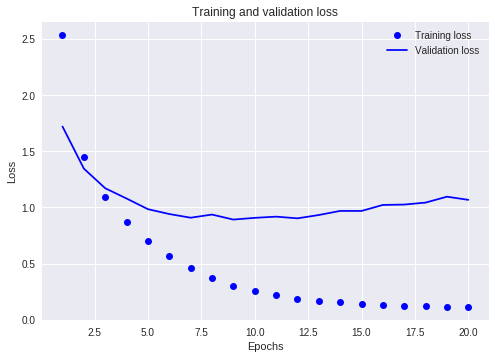

In [41]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

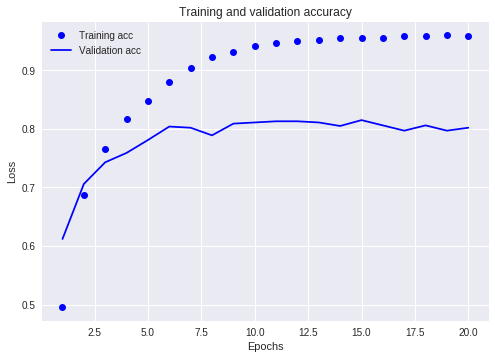

In [42]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [43]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 102us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 69us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 70us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 72us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 72us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 71us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 72us/step - loss: 0.4124 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8/9
798

In [44]:
results

[1.0224983127437737, 0.7756010686194165]

In [45]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.182546749777382

In [0]:
predictions = model.predict(x_test)

In [47]:
predictions[0].shape

(46,)

In [48]:
np.sum(predictions[0])

1.0

In [49]:
np.argmax(predictions[0])

3

In [0]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [0]:
model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['acc'])

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [53]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 133us/step - loss: 2.6576 - acc: 0.3773 - val_loss: 1.9684 - val_acc: 0.5280
Epoch 2/20
7982/7982 [==============================] - 1s 98us/step - loss: 1.6652 - acc: 0.6211 - val_loss: 1.5409 - val_acc: 0.6230
Epoch 3/20
7982/7982 [==============================] - 1s 99us/step - loss: 1.3324 - acc: 0.6706 - val_loss: 1.3951 - val_acc: 0.6790
Epoch 4/20
7982/7982 [==============================] - 1s 104us/step - loss: 1.1420 - acc: 0.7269 - val_loss: 1.3235 - val_acc: 0.6970
Epoch 5/20
7982/7982 [==============================] - 1s 104us/step - loss: 1.0109 - acc: 0.7457 - val_loss: 1.2704 - val_acc: 0.7010
Epoch 6/20
7982/7982 [==============================] - 1s 104us/step - loss: 0.9098 - acc: 0.7580 - val_loss: 1.2778 - val_acc: 0.7070
Epoch 7/20
7982/7982 [==============================] - 1s 103us/step - loss: 0.8304 - acc: 0.7742 - val_loss: 1.2595 - val_acc: 0.7080
Ep

7982/7982 [==============================] - 1s 103us/step - loss: 0.6626 - acc: 0.8109 - val_loss: 1.3244 - val_acc: 0.7020
Epoch 11/20
7982/7982 [==============================] - 1s 102us/step - loss: 0.6172 - acc: 0.8190 - val_loss: 1.3556 - val_acc: 0.7110
Epoch 12/20
7982/7982 [==============================] - 1s 102us/step - loss: 0.5787 - acc: 0.8326 - val_loss: 1.3915 - val_acc: 0.7110
Epoch 13/20
7982/7982 [==============================] - 1s 102us/step - loss: 0.5408 - acc: 0.8444 - val_loss: 1.4515 - val_acc: 0.7080
Epoch 14/20
7982/7982 [==============================] - 1s 103us/step - loss: 0.5086 - acc: 0.8552 - val_loss: 1.4671 - val_acc: 0.7130
Epoch 15/20
7982/7982 [==============================] - 1s 101us/step - loss: 0.4773 - acc: 0.8667 - val_loss: 1.5340 - val_acc: 0.7110
Epoch 16/20
7982/7982 [==============================] - 1s 104us/step - loss: 0.4493 - acc: 0.8802 - val_loss: 1.5457 - val_acc: 0.7060
Epoch 17/20
7982/7982 [==============================

Epoch 20/20
7982/7982 [==============================] - 1s 101us/step - loss: 0.3661 - acc: 0.8971 - val_loss: 1.7331 - val_acc: 0.7060


# Regression Example

# Housing Dataset

In [54]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) =boston_housing.load_data()

57344/57026 [==============================] - 0s 4us/step


In [55]:
train_data.shape

(404, 13)

In [56]:
test_data.shape

(102, 13)

In [58]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [0]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

In [0]:
test_data -= mean
test_data /= std

In [0]:
from keras import models
from keras import layers
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model


In [0]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [63]:
for i in range(k):
  print('processing fold #', i)
val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [0]:
import numpy as np
partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
model = build_model()
model.fit(partial_train_data, partial_train_targets,
epochs=num_epochs, batch_size=1, verbose=0)
val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
all_scores.append(val_mae)

In [65]:
all_scores

[2.5258051611409327]

In [66]:
np.mean(all_scores)

2.5258051611409327

In [67]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print('processing fold #', i)
val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
partial_train_data = np.concatenate(
[train_data[:i * num_val_samples],
train_data[(i + 1) * num_val_samples:]],
axis=0)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [0]:
partial_train_targets = np.concatenate(
[train_targets[:i * num_val_samples],
train_targets[(i + 1) * num_val_samples:]],axis=0)
model = build_model()
history = model.fit(partial_train_data, partial_train_targets,
validation_data=(val_data, val_targets),
epochs=num_epochs, batch_size=1, verbose=0)
mae_history = history.history['val_mean_absolute_error']
all_mae_histories.append(mae_history)

In [0]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

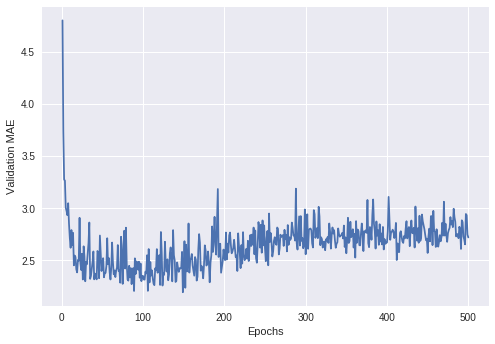

In [70]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

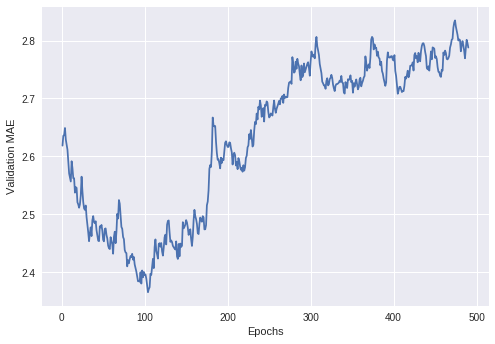

In [71]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [74]:
model = build_model()
model.fit(train_data, train_targets,
epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 1ms/step


In [75]:
test_mae_score

2.5547659911361396